In [1]:
# ============================================
# || import all necessary libraries         ||
# ============================================

import numpy as np
#import matplotlib.pyplot as plt
import random
import time
#from typing import Dict, List, Tuple, Any
#import sys
#import os

# Utilities
from utils.data import get_fixed_data
from utils.visualization import plot_results, plot_experiment_results, plot_cost_histogram, compare_policies

# Task 0
## Liv har code som er brugt til de to scenarier

Optimal cost: 1211.41


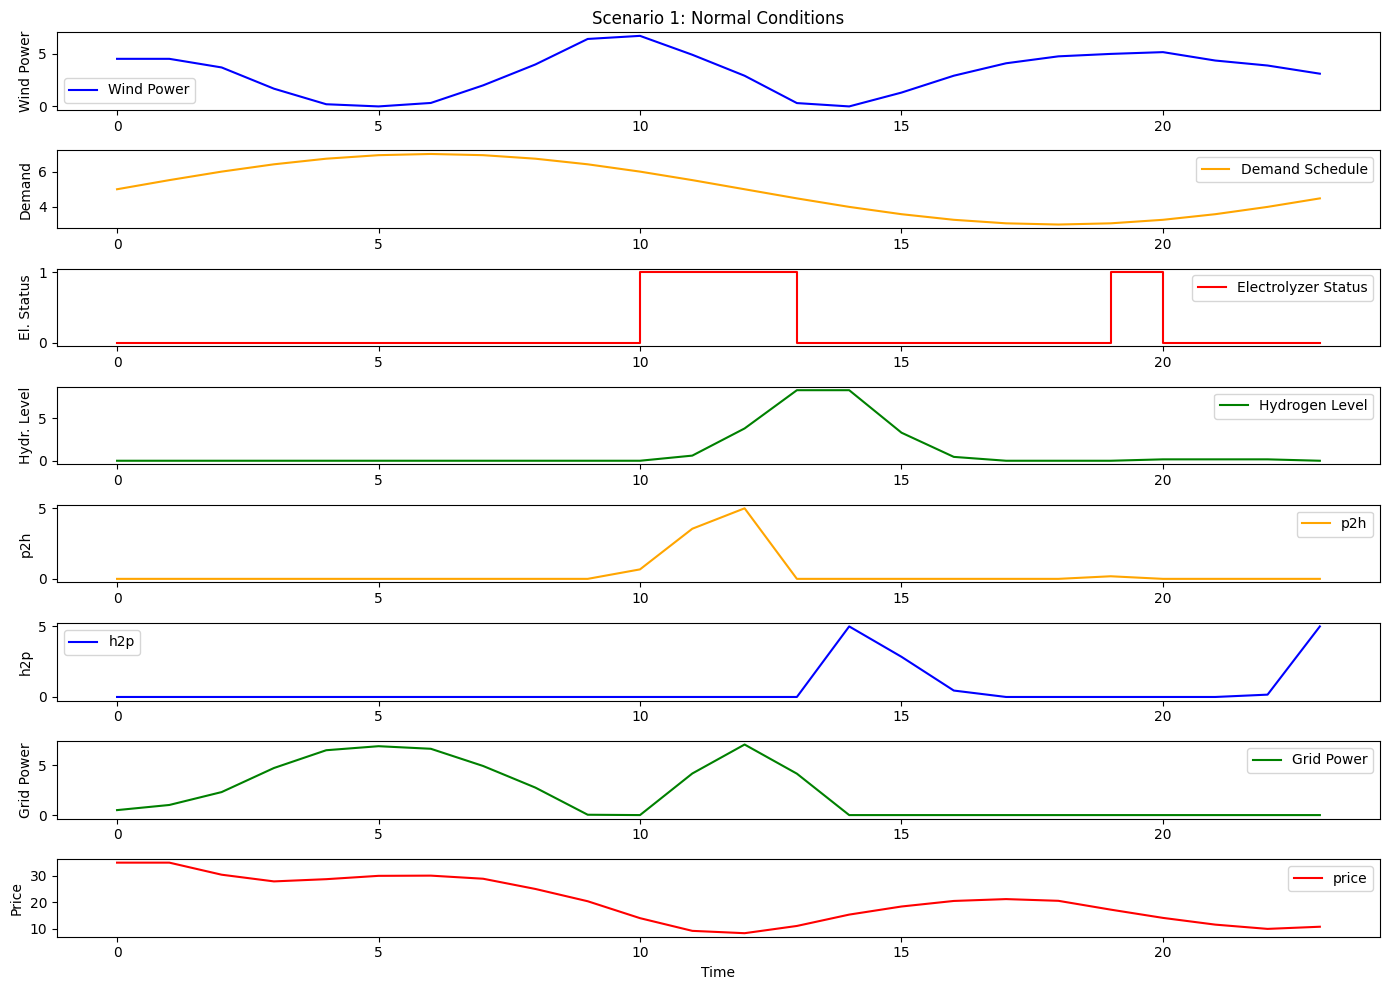

Optimal cost: 294.54


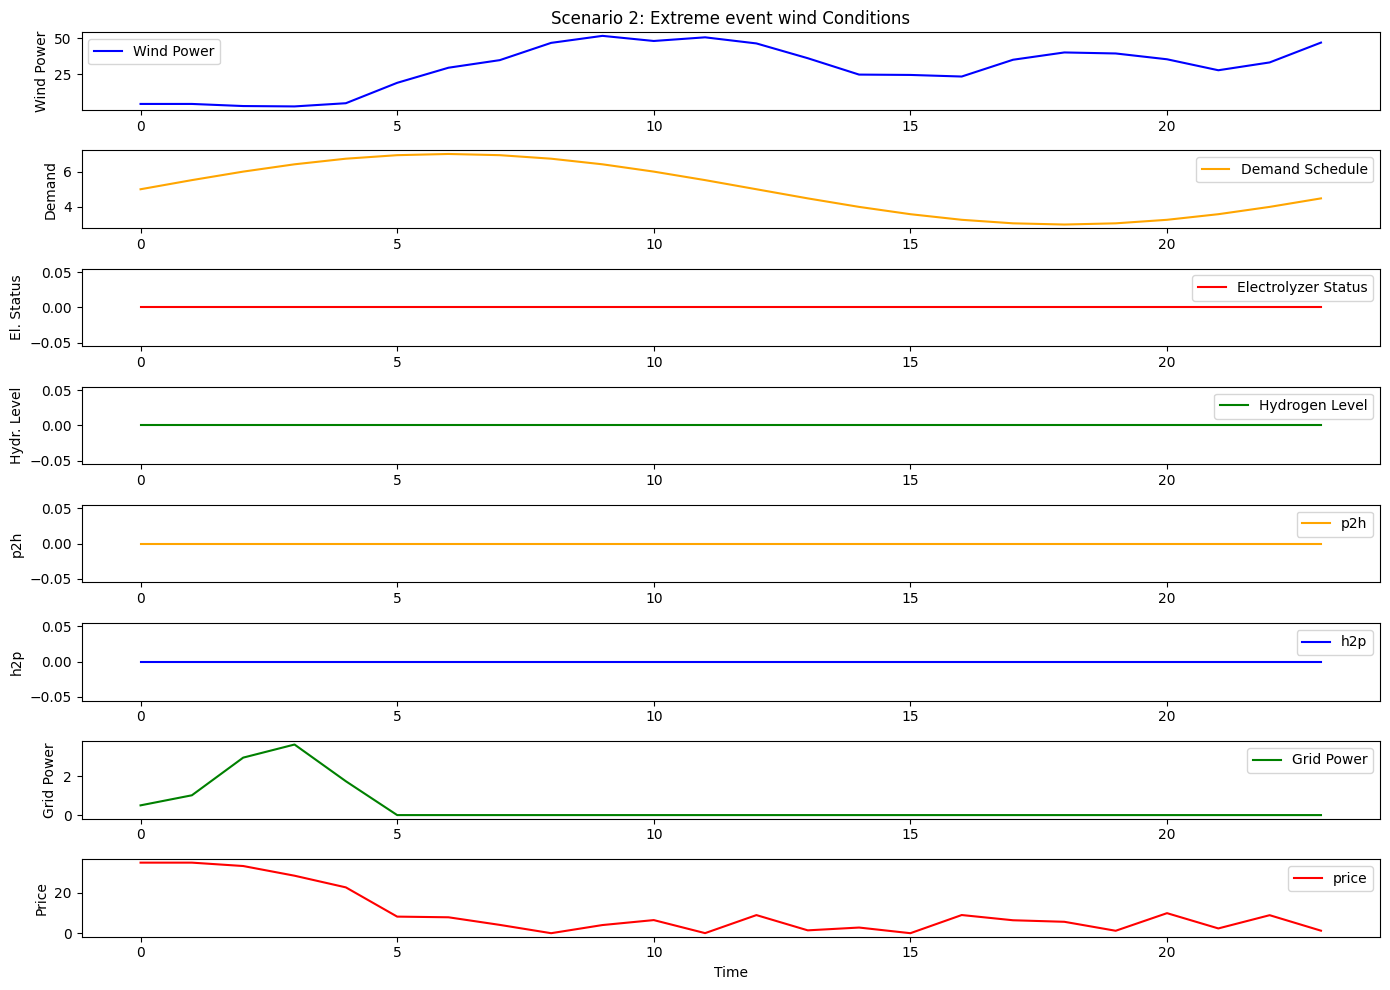

In [2]:
from task_0.helper_functions import generate_trajectories, solve_milp

def main() -> None:
    data = get_fixed_data()
    
    # First scenario - Normal conditions
    wind1, price1 = generate_trajectories(data)
    results1 = solve_milp(wind1, price1, data, False)
    plot_results(wind1, price1, results1, data, "Scenario 1: Normal Conditions")

    # Second scenario - More volatile conditions?
    data_volatile = data.copy()
    data_volatile['extreme_event_prob_wind'] = 0.8

    wind2, price2 = generate_trajectories(data_volatile)
    results2 = solve_milp(wind2, price2, data, False)
    plot_results(wind2, price2, results2, data, "Scenario 2: Extreme event wind Conditions")
random.seed(42)
main()

# Task 1

In [3]:
from task_1.evaluation_framework import create_experiments
data = get_fixed_data()
create_experiments(3, data)


([0, 1, 2],
 array([[ 4.5       ,  4.5       ,  4.01949764,  3.43938818,  1.6262557 ,
          0.9059549 ,  0.12766484,  0.        ,  1.1883298 ,  2.59276958,
          3.07460134,  5.17929962,  7.64475121,  9.94906326, 10.53399848,
         11.43796919, 11.12419596, 10.88726161, 10.69433049,  9.62667186,
          7.65803356,  6.09135781,  4.4104282 ,  2.37844323],
        [ 4.5       ,  4.5       , 17.56726803, 26.36429703, 28.66973193,
         27.25339435, 23.3755844 , 17.32165911, 11.56096351,  6.78103087,
          2.57885982,  0.9730631 ,  0.        ,  0.        ,  0.99275226,
          3.49873829,  7.51585974, 10.49359166, 13.62332704, 14.50599963,
         13.06020235, 10.46957073,  5.48753941,  2.50143732],
        [ 4.5       ,  4.5       ,  4.68294425,  4.91297618,  4.61913309,
          3.43637799,  3.63549579,  3.52432896,  2.90308209,  2.10094742,
          1.29258013,  0.72207389,  2.13996155,  2.81007378,  3.65902437,
          4.15565624,  4.48639086,  4.67841763,  3

ENERGY HUB MDP EVALUATION

Evaluating Dummy Policy over 20 experiments...
Processing experiment 0...
Processing experiment 5...
Processing experiment 10...
Processing experiment 15...
Average policy cost: 791.35
Min cost: 337.29, Max cost: 1253.93
Dummy Policy Results:
Average Cost: 791.35
Min Cost: 337.29
Max Cost: 1253.93
Evaluation Time: 0.00 seconds

Generating visualizations...

Generating visualizations for Dummy Policy...


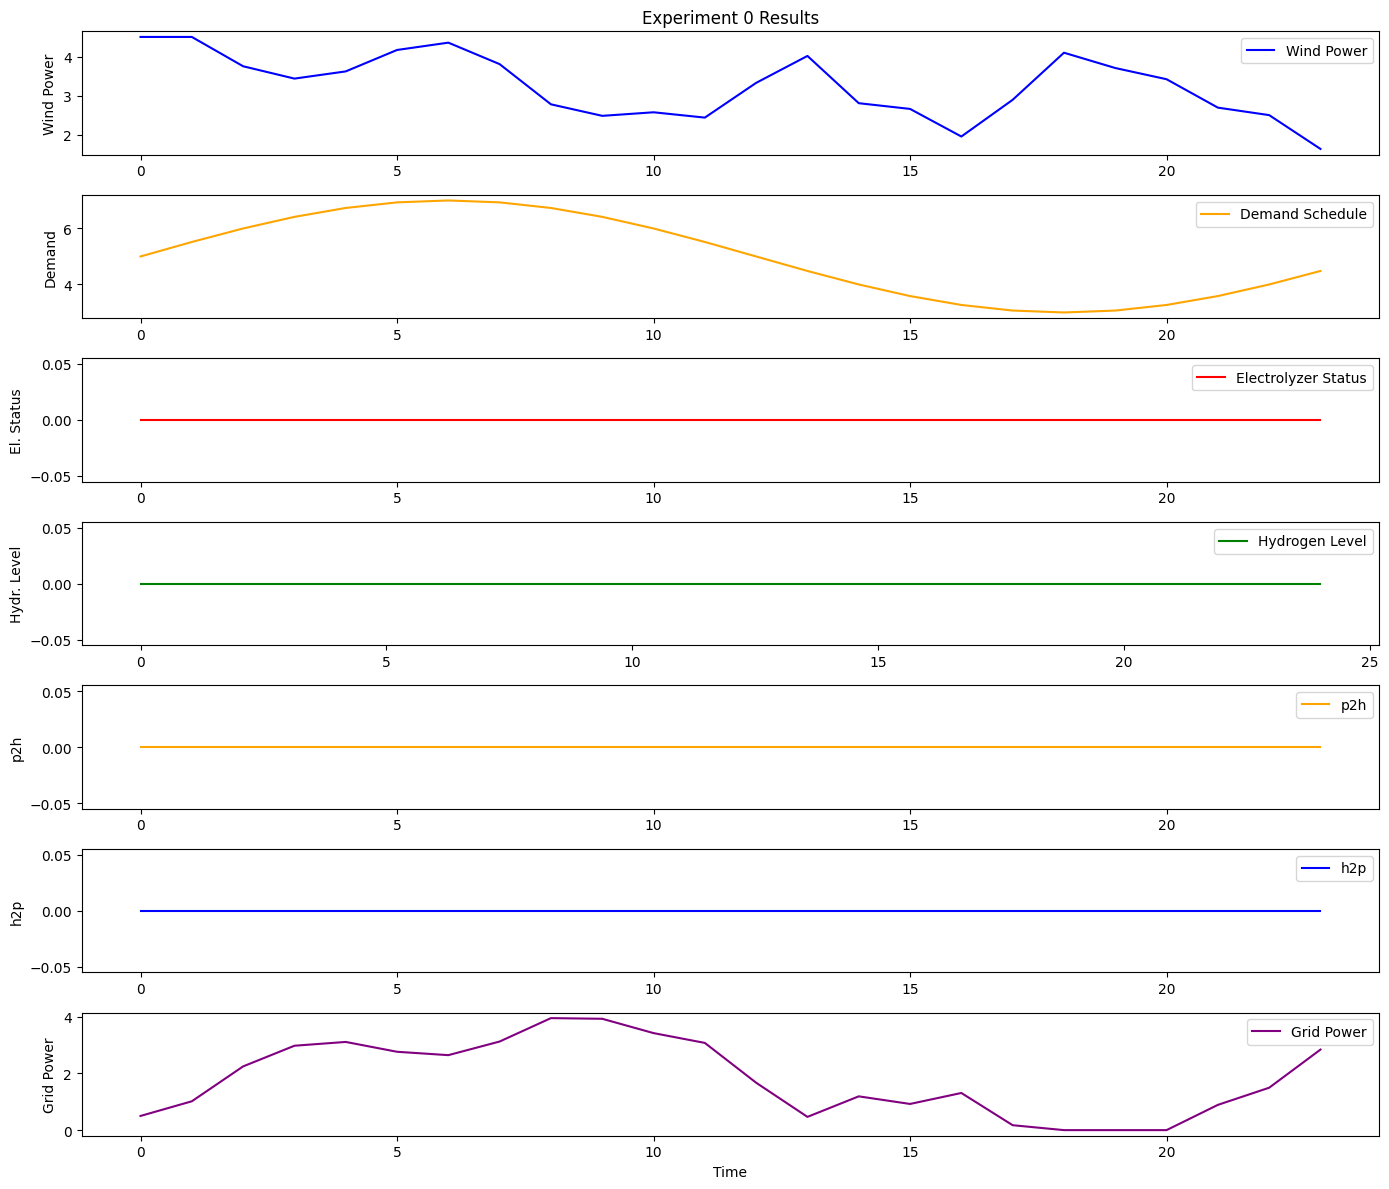

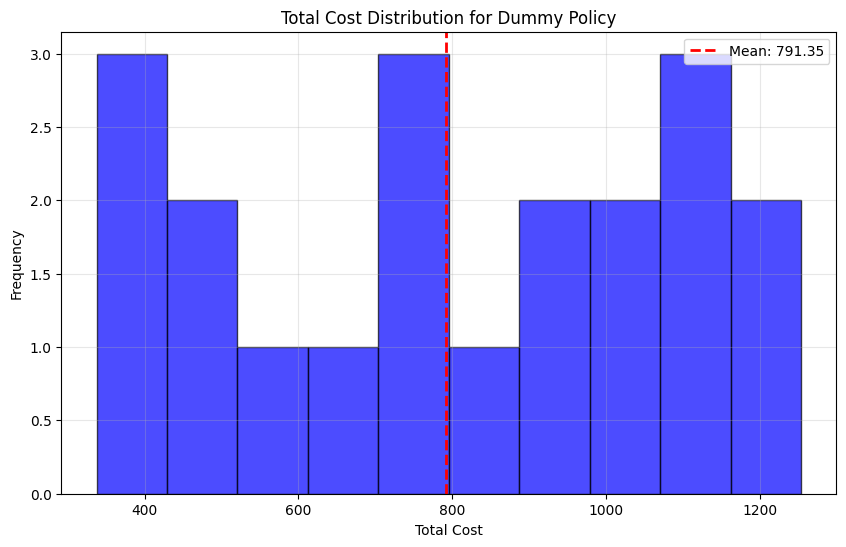


Evaluation completed successfully!


In [4]:
from task_1.evaluation_framework import evaluate_policy
from task_1.energy_hub_policies import dummy_policy
def main():
    data = get_fixed_data()
    
    print("=" * 50)
    print("ENERGY HUB MDP EVALUATION")
    print("=" * 50)
    num_experiments = 20
    policy_results = {}
    policies = {
        "Dummy Policy": dummy_policy
    }
    expers, wind_trajectories, price_trajectories = create_experiments(num_experiments, data)
    # Evaluate each policy
    for policy_name, policy_func in policies.items():
        print(f"\nEvaluating {policy_name} over {num_experiments} experiments...")
        start_time = time.time()
        
        avg_cost, results = evaluate_policy(policy_func,data, expers, wind_trajectories, price_trajectories, num_experiments, _debug=True)
        #avg_cost, results = evaluate_policy(policy_func, num_experiments=num_experiments)
        
        elapsed_time = time.time() - start_time
        
        print(f"{policy_name} Results:")
        print(f"Average Cost: {avg_cost:.2f}")
        print(f"Min Cost: {np.min(results['total_costs']):.2f}")
        print(f"Max Cost: {np.max(results['total_costs']):.2f}")
        print(f"Evaluation Time: {elapsed_time:.2f} seconds")
        
        # Store the results
        policy_results[policy_name] = results
    
    print("\nGenerating visualizations...")
    
    for policy_name, results in policy_results.items():
        print(f"\nGenerating visualizations for {policy_name}...")
        
        plot_experiment_results(results, experiment_index=0, data=data) # just the first experiment
        
        plot_cost_histogram(results, policy_name=policy_name) # histogram of total costs over all experiments
    
    print("\nEvaluation completed successfully!")
    
    return policy_results

if __name__ == "__main__":
    policy_results = main()

# Task 2

TASK 2: STOCHASTIC PROGRAMMING POLICIES FOR ENERGY HUB MANAGEMENT

--------------------------------------------------
Evaluating: Dummy Policy
--------------------------------------------------
Processing experiment 0...
Processing experiment 5...
Average policy cost: 856.12
Min cost: 249.96, Max cost: 1465.74

Results for Dummy Policy:
Average Cost: 856.12
Min Cost: 249.96
Max Cost: 1465.74
Standard Deviation: 373.52
Evaluation Time: 0.00 seconds

--------------------------------------------------
Evaluating: Expected Value Policy (H=3)
--------------------------------------------------
Processing experiment 0...
Processing experiment 5...
Average policy cost: 832.87
Min cost: 249.96, Max cost: 1465.74

Results for Expected Value Policy (H=3):
Average Cost: 832.87
Min Cost: 249.96
Max Cost: 1465.74
Standard Deviation: 382.25
Evaluation Time: 8.58 seconds

--------------------------------------------------
Evaluating: SP Policy (H=3, S=10)
----------------------------------------------

/Users/khs/code/DMUU/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/khs/code/DMUU/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/khs/code/DMUU/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/khs/code/DMUU/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **

Processing experiment 5...


/Users/khs/code/DMUU/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/khs/code/DMUU/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/khs/code/DMUU/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/khs/code/DMUU/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **

Average policy cost: 824.57
Min cost: 268.62, Max cost: 1361.56

Results for SP Policy (H=10, S=2):
Average Cost: 824.57
Min Cost: 268.62
Max Cost: 1361.56
Standard Deviation: 393.70
Evaluation Time: 434.84 seconds

Generating visualizations...

Visualizing results for Dummy Policy...


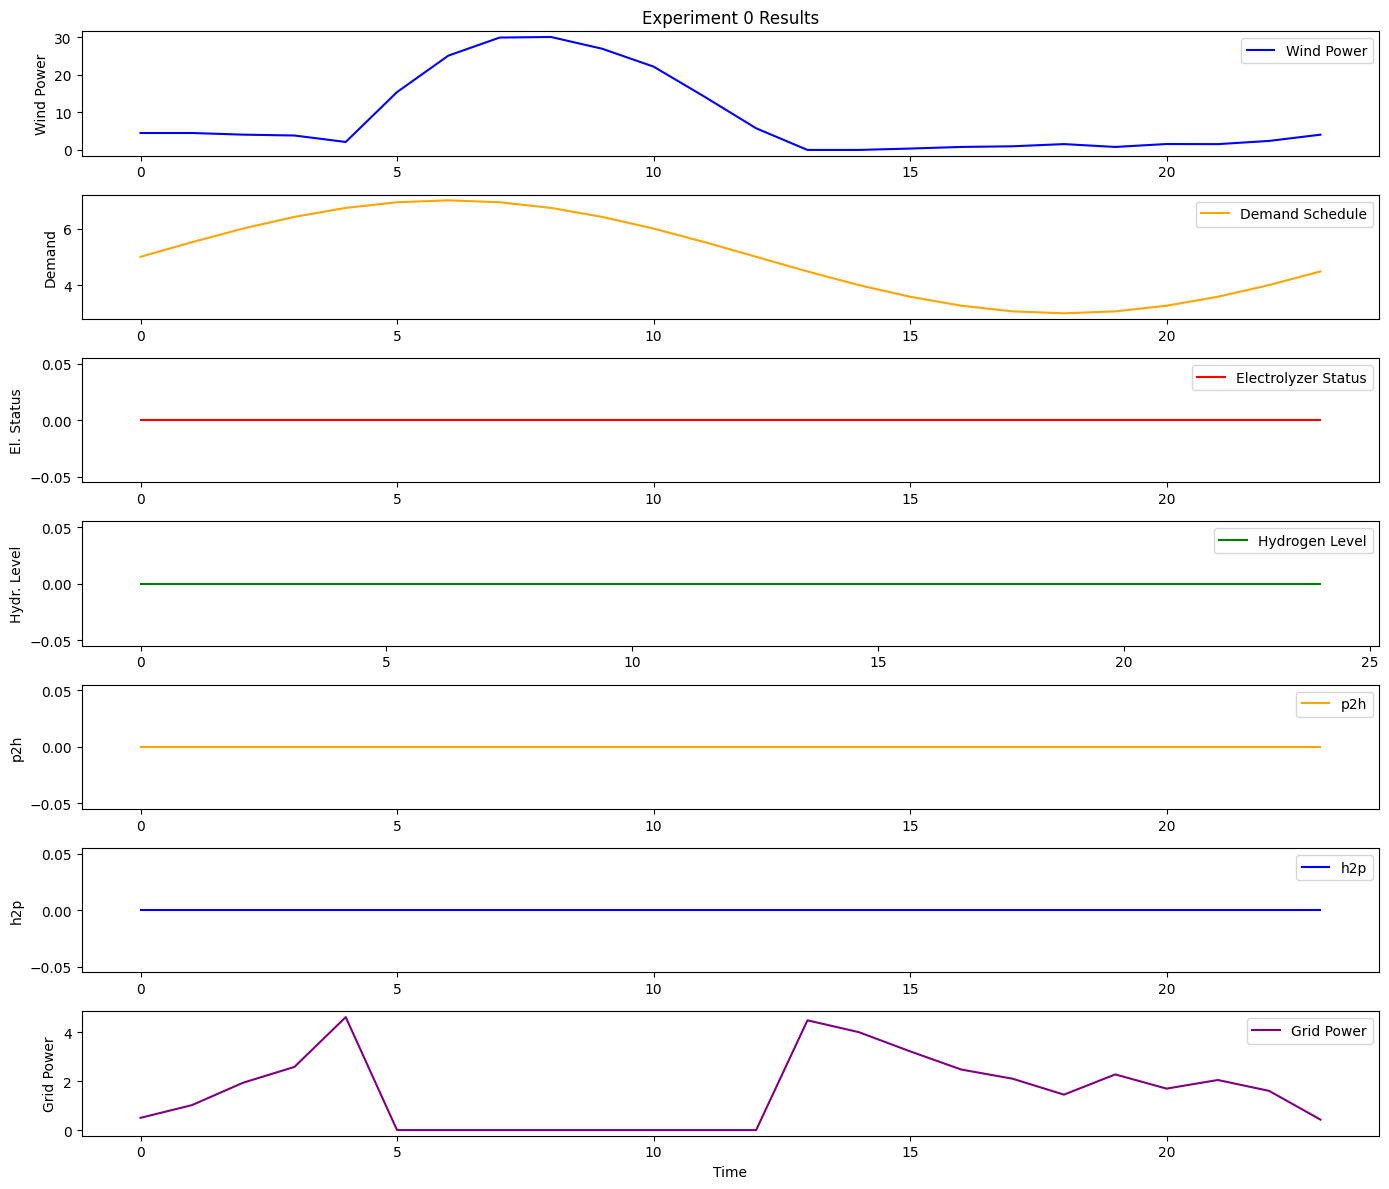

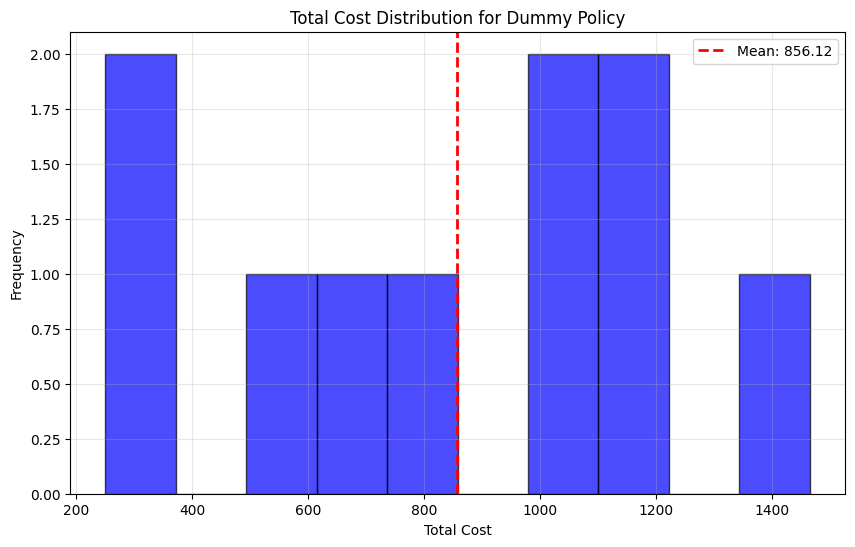


Visualizing results for Expected Value Policy (H=3)...


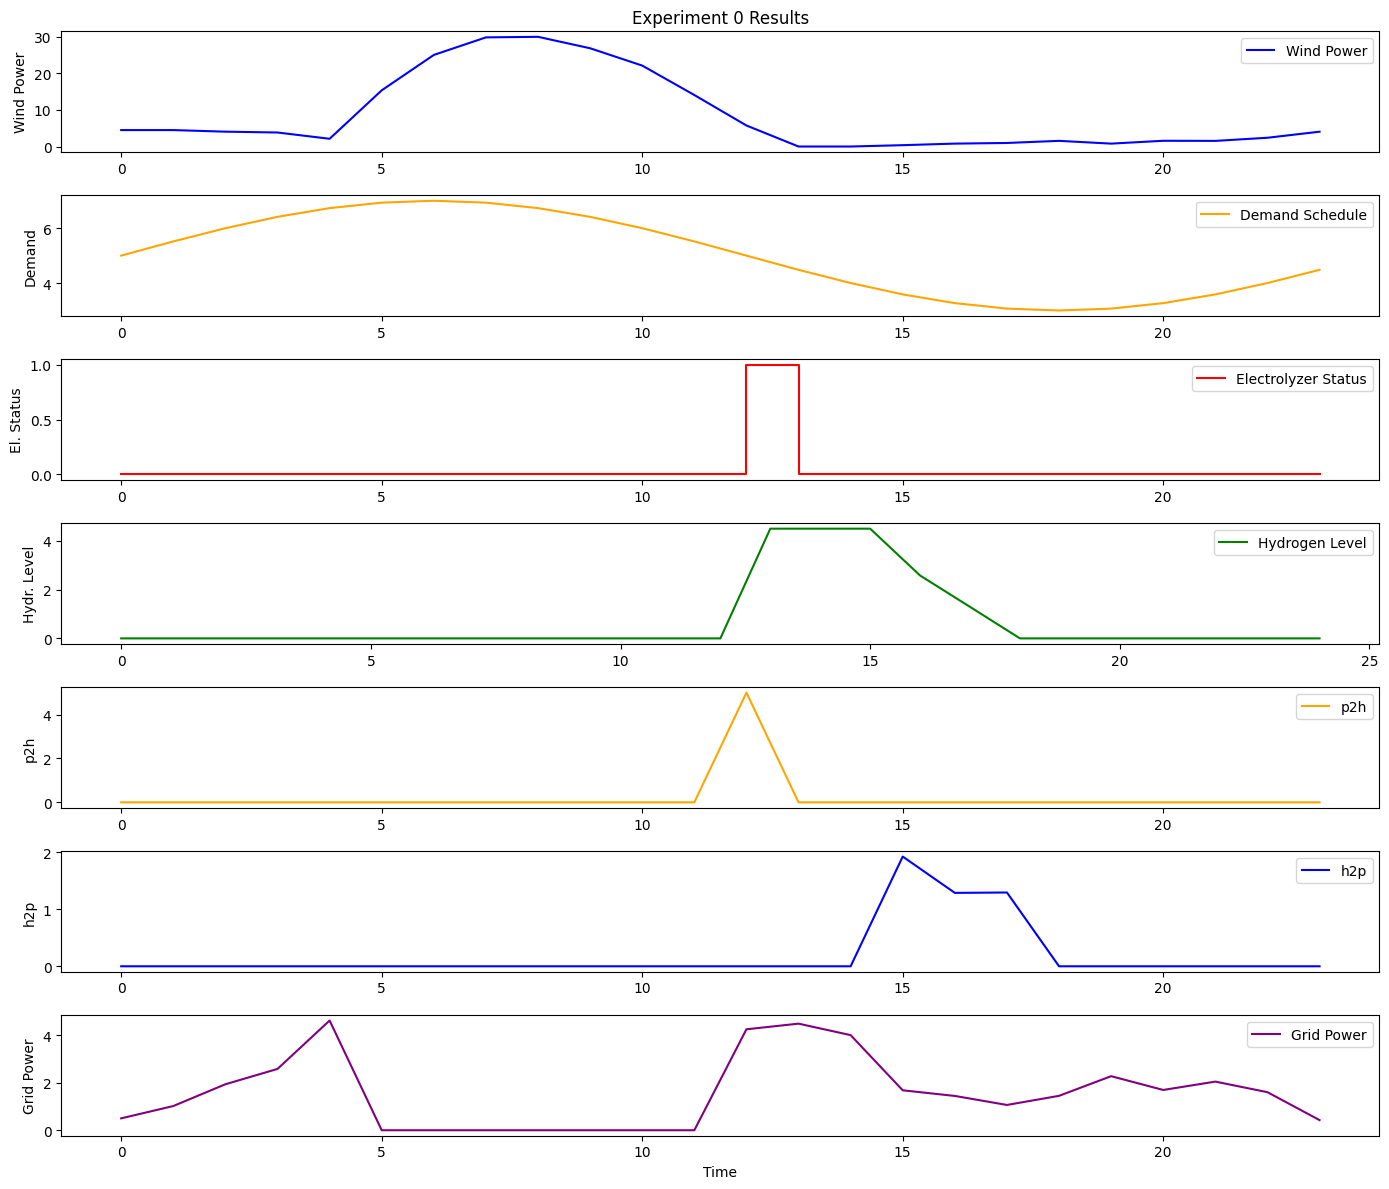

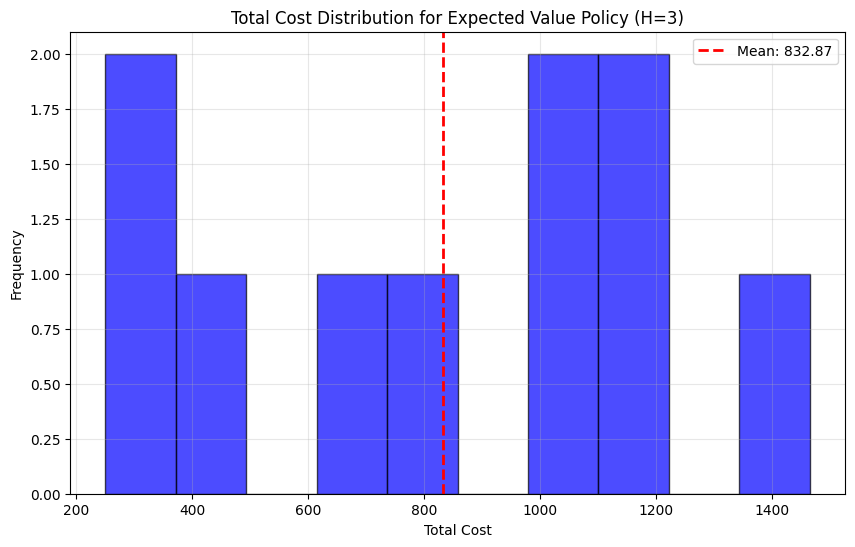


Visualizing results for SP Policy (H=3, S=10)...


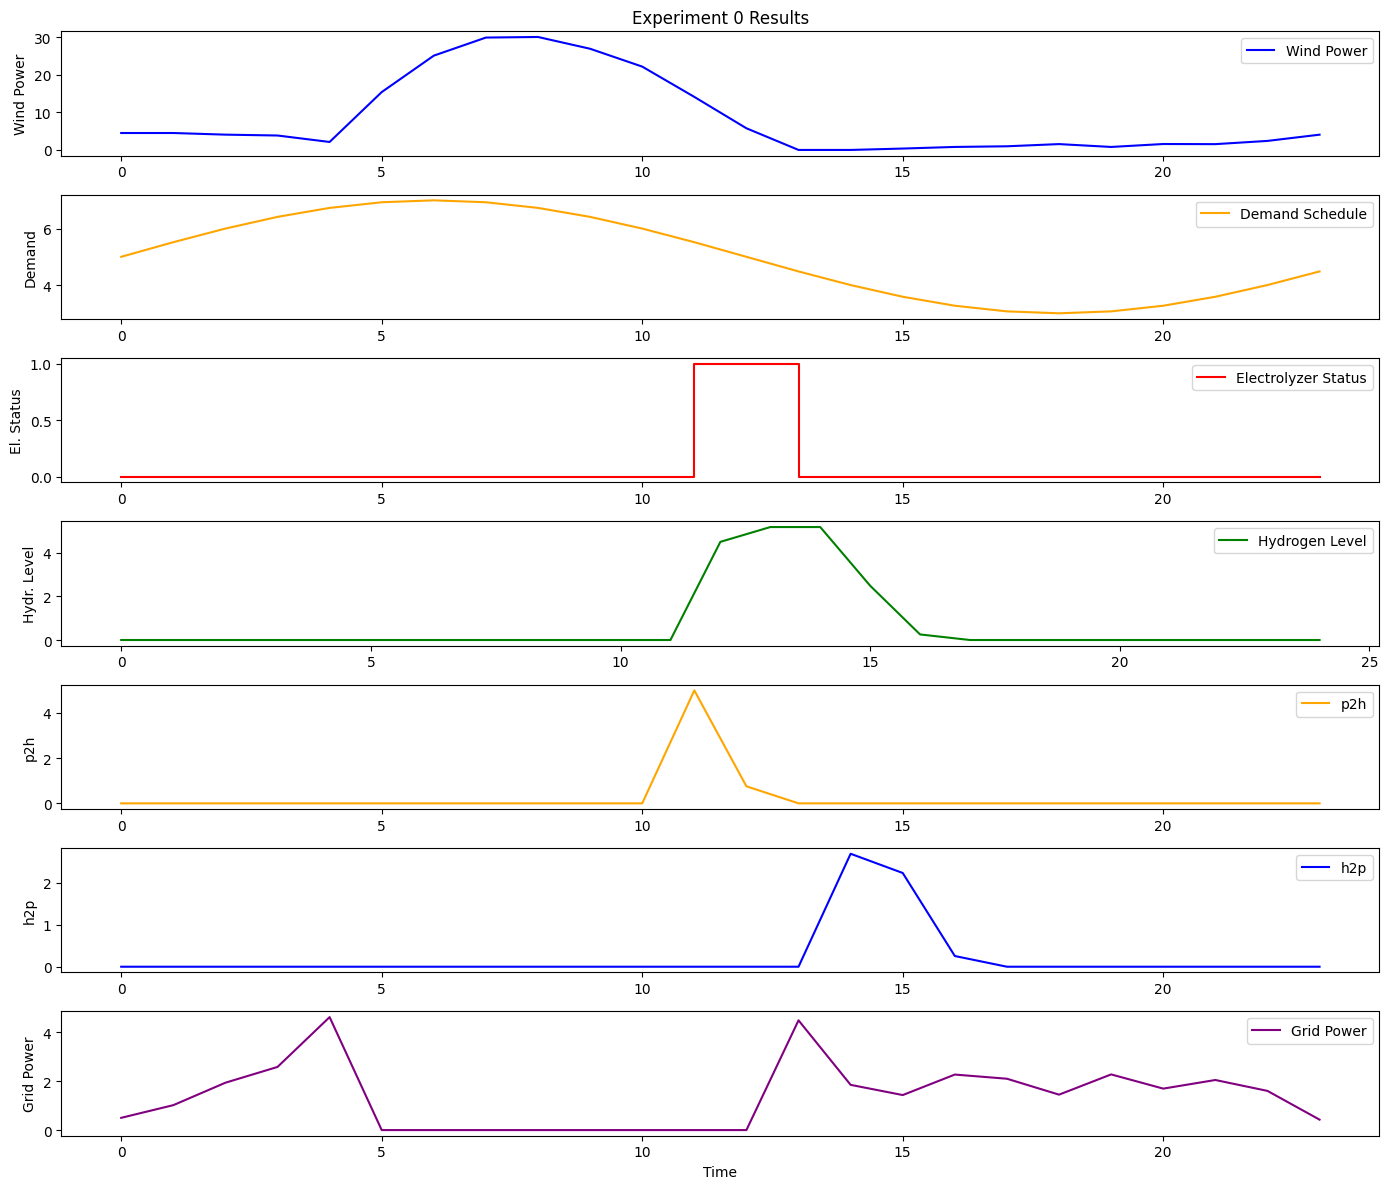

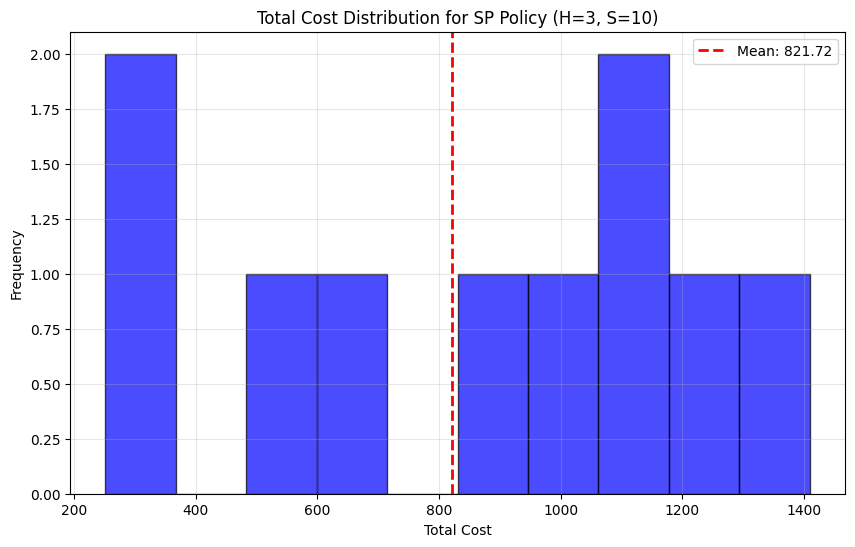


Visualizing results for SP Policy (H=4, S=6)...


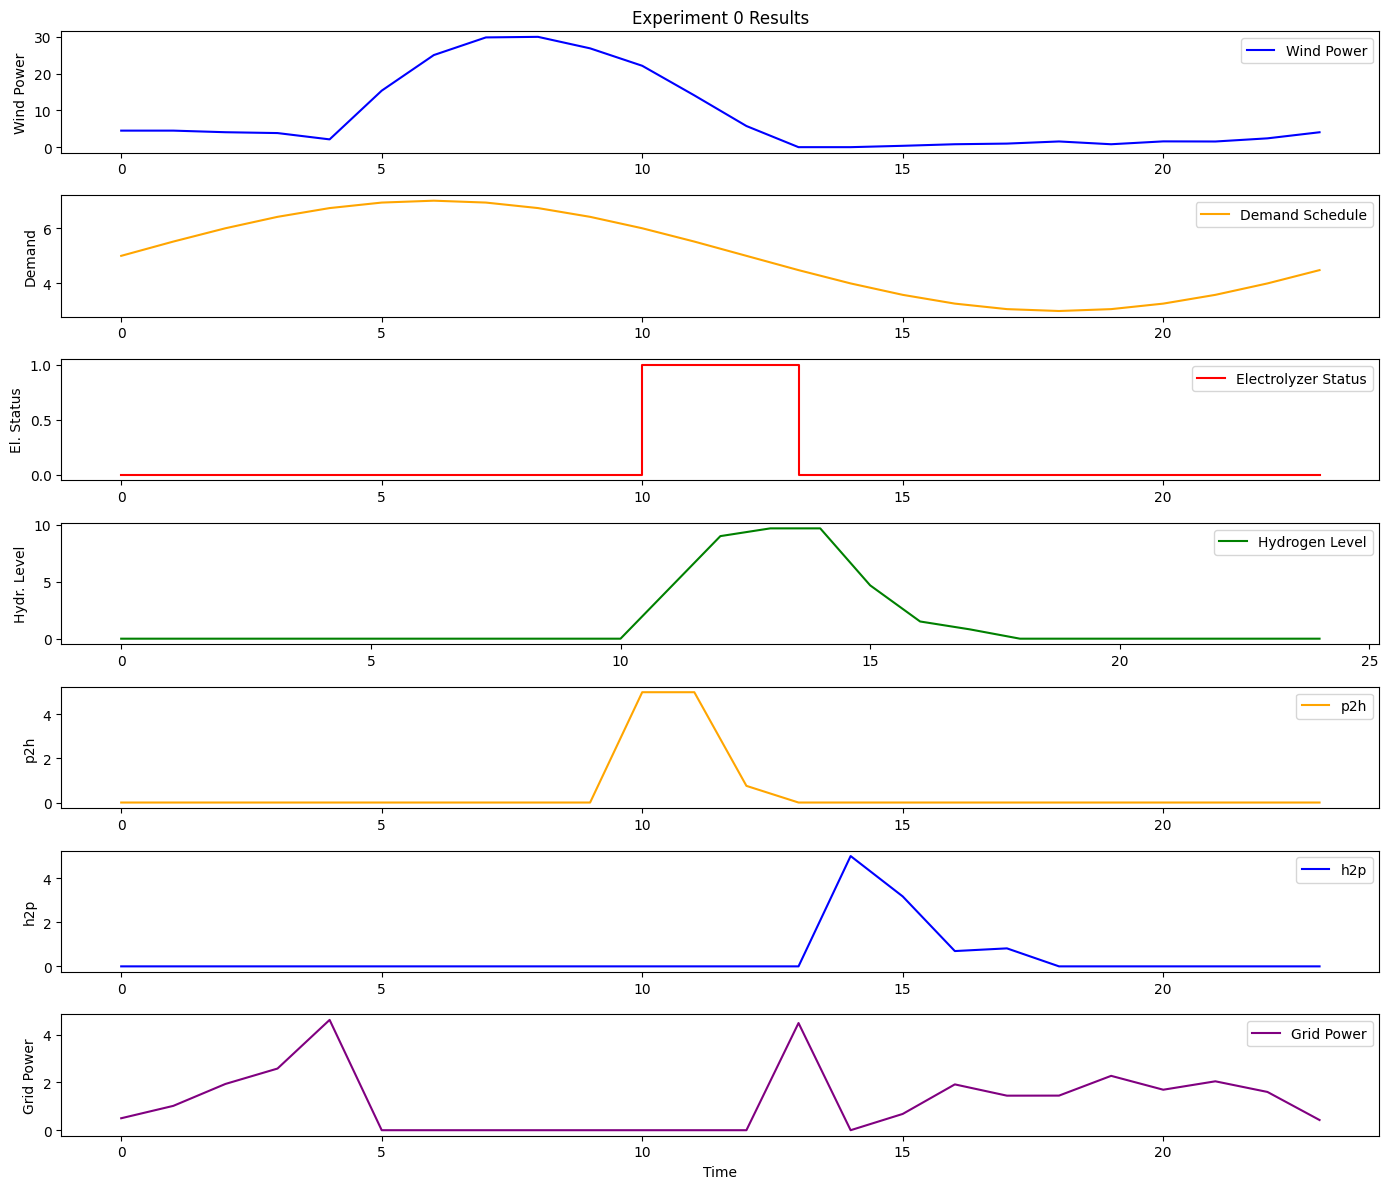

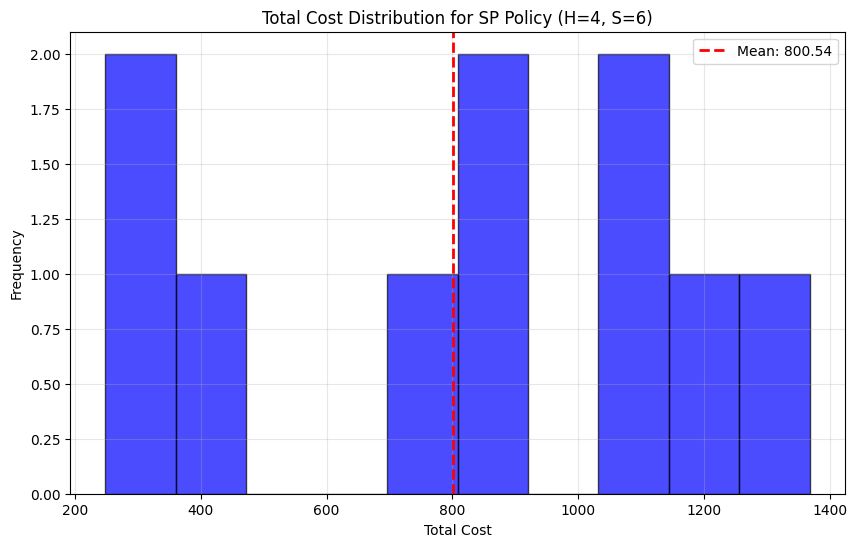


Visualizing results for SP Policy (H=5, S=3)...


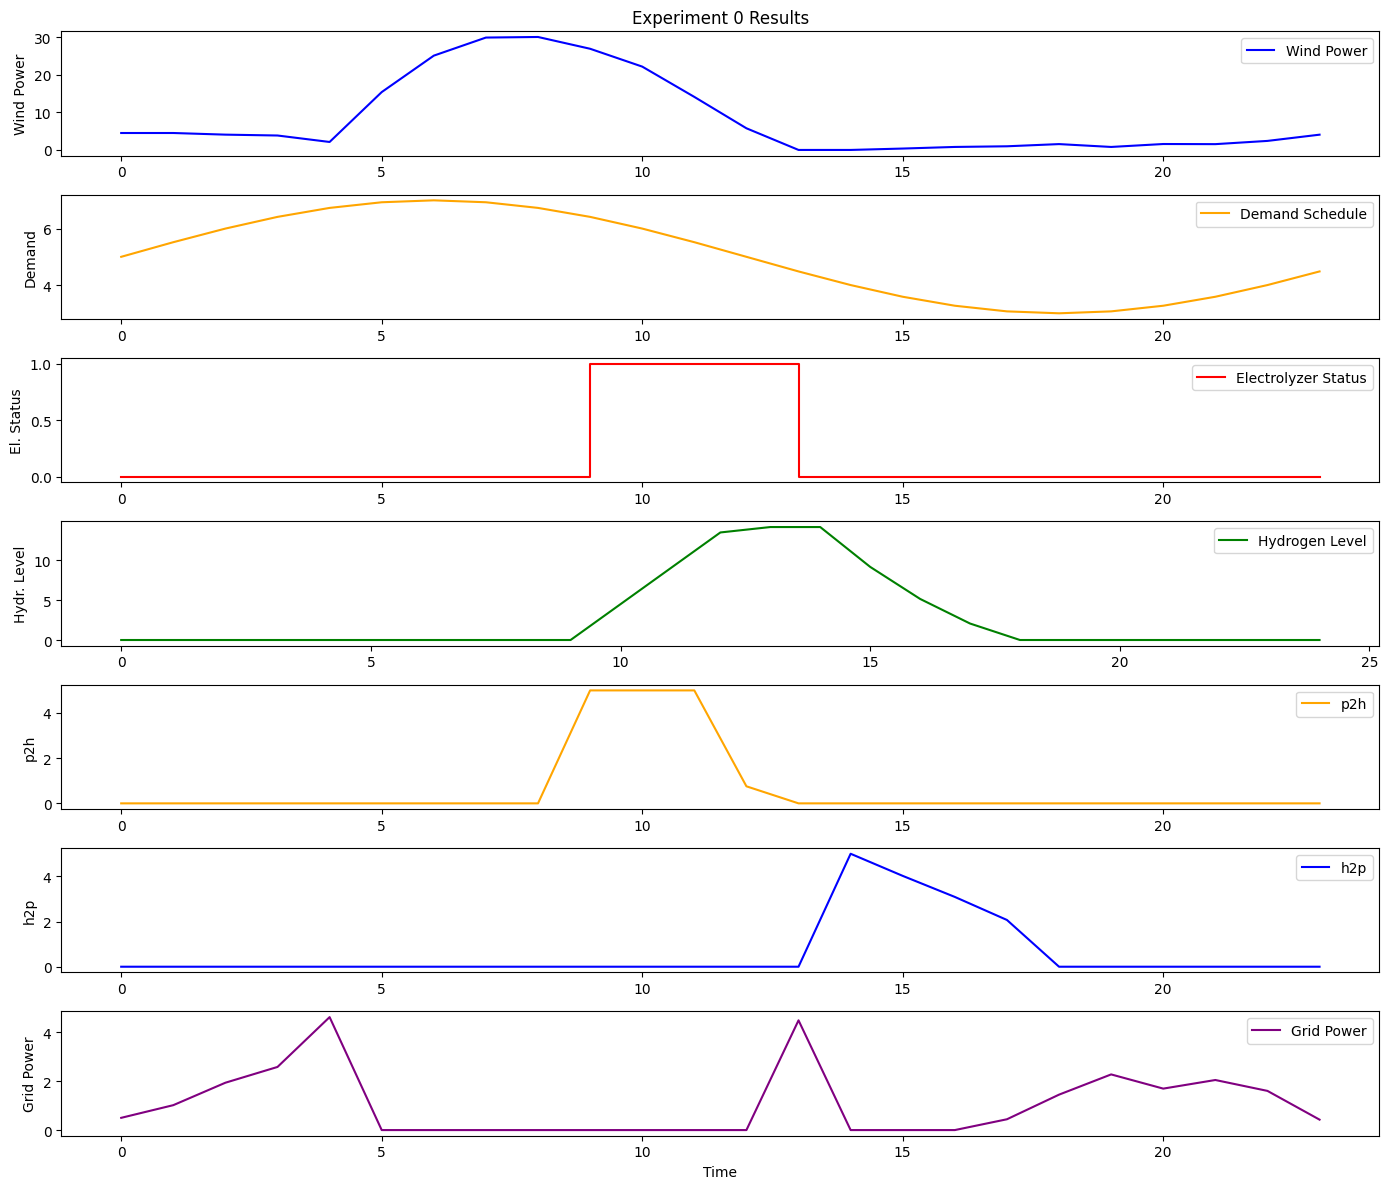

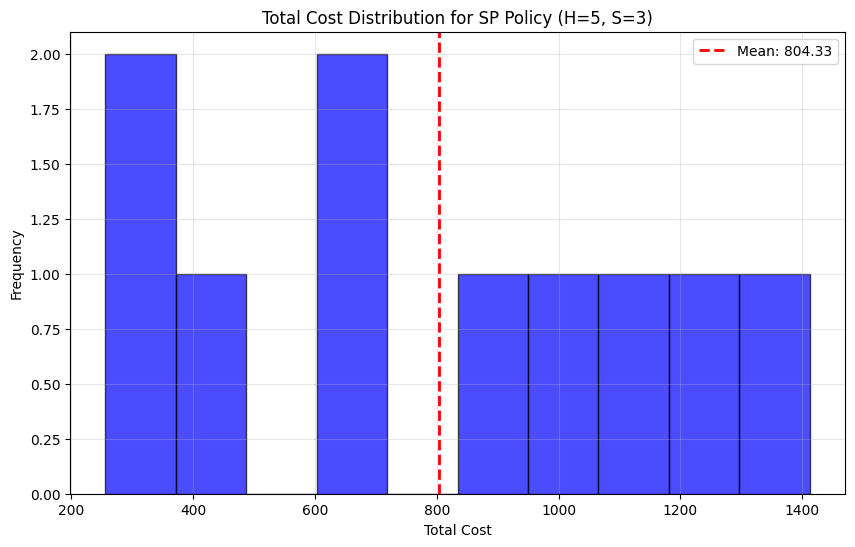


Visualizing results for SP Policy (H=10, S=2)...


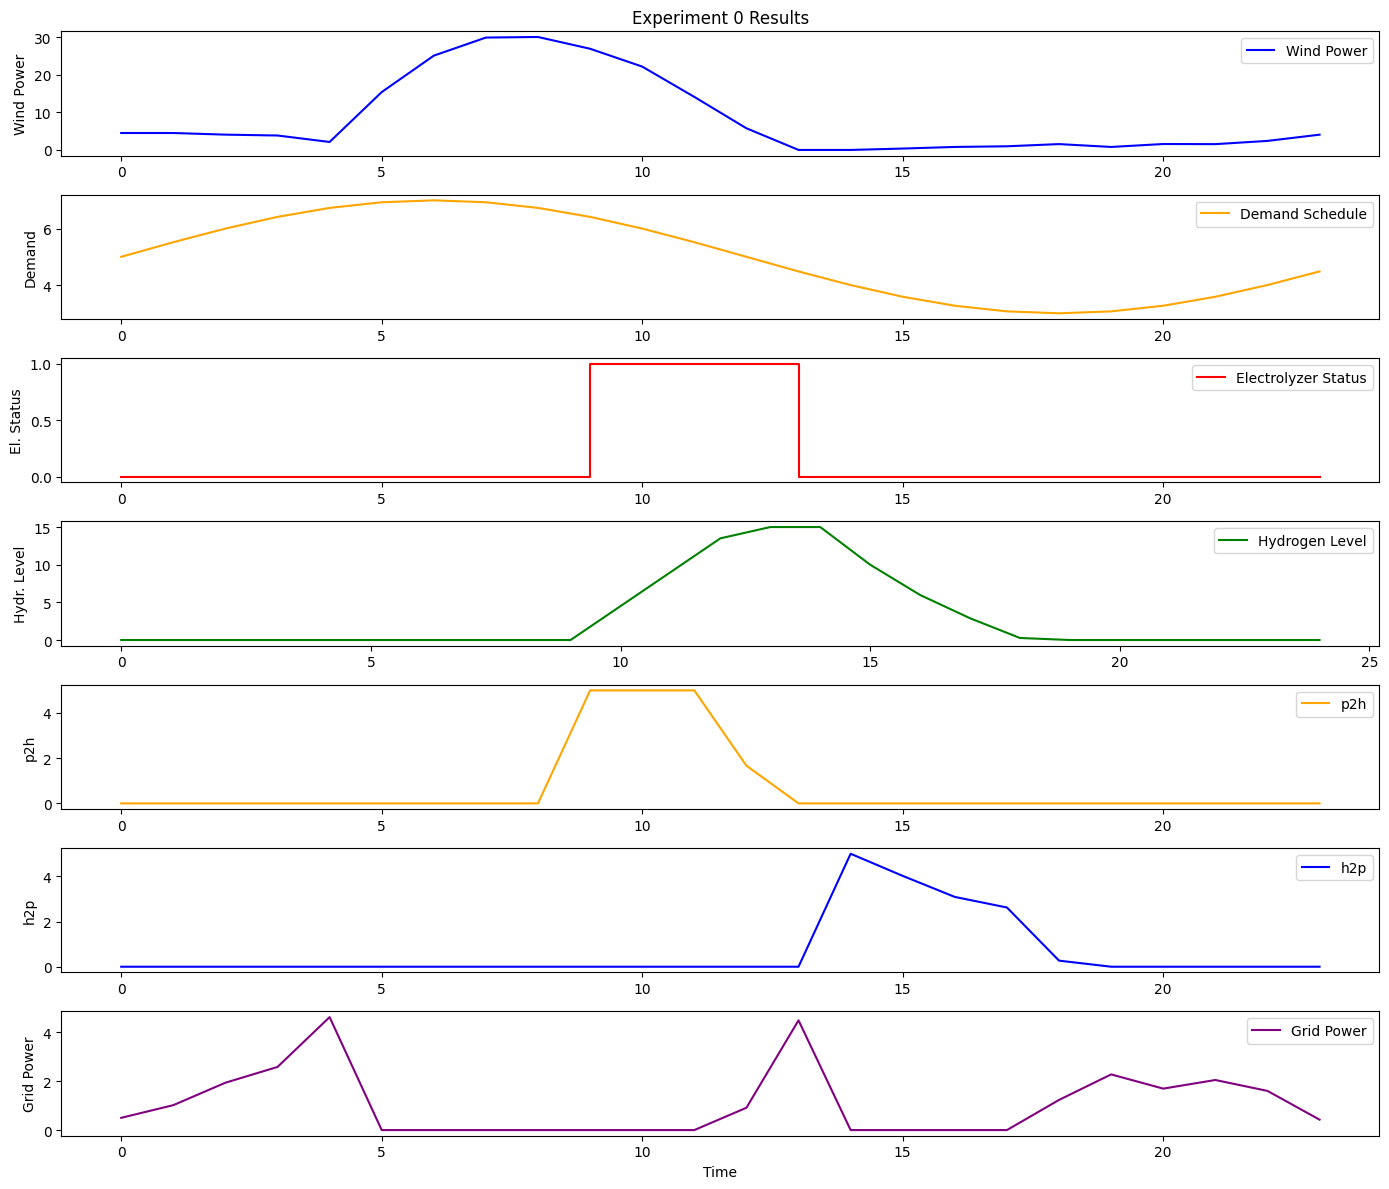

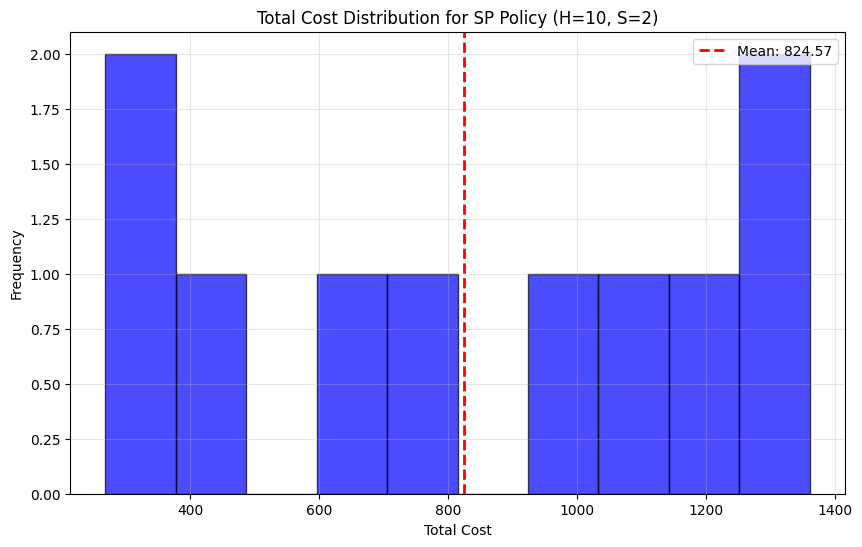


Generating comparison across all policies...


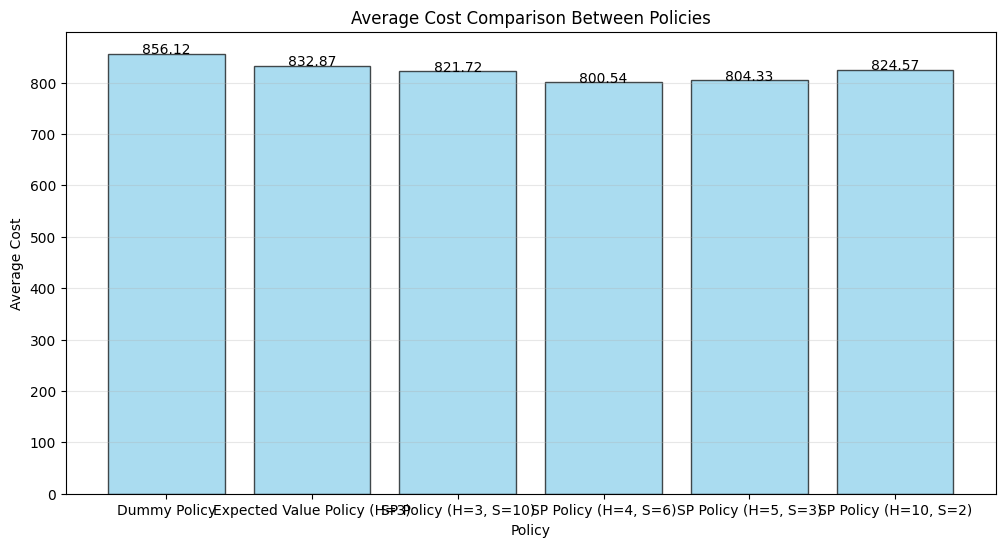


Task 2 evaluation completed successfully!


In [5]:
from task_2.helper_functions_2 import create_ev_policy, create_sp_policy

def main():
    data = get_fixed_data()
    
    print("=" * 70)
    print("TASK 2: STOCHASTIC PROGRAMMING POLICIES FOR ENERGY HUB MANAGEMENT")
    print("=" * 70)
    
    # Is this enough?
    num_experiments = 10
    
    policy_results = {} # store results
    
    sp_policy_config1 = create_sp_policy(horizon=3, branches_per_stage=10)
    sp_policy_config2 = create_sp_policy(horizon=4, branches_per_stage=6)
    sp_policy_config3 = create_sp_policy(horizon=5, branches_per_stage=3)
    sp_policy_config4 = create_sp_policy(horizon=10, branches_per_stage=3) # branches needs to be larger than 2
    ev_policy_config = create_ev_policy(horizon=3, num_samples=100)

    policies = {
        "Dummy Policy": dummy_policy,
        "Expected Value Policy (H=3)": ev_policy_config,
        "SP Policy (H=3, S=10)": sp_policy_config1,
        "SP Policy (H=4, S=6)": sp_policy_config2,
        "SP Policy (H=5, S=3)": sp_policy_config3,
        "SP Policy (H=10, S=2)": sp_policy_config4
    }
    expers, wind_trajectories, price_trajectories = create_experiments(num_experiments, data)
    for policy_name, policy_func in policies.items():
        print(f"\n{'-' * 50}")
        print(f"Evaluating: {policy_name}")
        print(f"{'-' * 50}")
        
        start_time = time.time()
        
        try:
            avg_cost, results = evaluate_policy(policy_func, data, expers, wind_trajectories, price_trajectories, num_experiments, _debug=True)
            
            elapsed_time = time.time() - start_time
            
            print(f"\nResults for {policy_name}:")
            print(f"Average Cost: {avg_cost:.2f}")
            print(f"Min Cost: {np.min(results['total_costs']):.2f}")
            print(f"Max Cost: {np.max(results['total_costs']):.2f}")
            print(f"Standard Deviation: {np.std(results['total_costs']):.2f}")
            print(f"Evaluation Time: {elapsed_time:.2f} seconds")
            policy_results[policy_name] = results
            
        except Exception as e:
            print(f"Error evaluating {policy_name}: {e}")
    
    # Generate visualizations if results are available
    # Here claude.ai is used to write the visualizations
    if policy_results:
        print("\nGenerating visualizations...")
        
        # Generate individual policy visualizations
        for policy_name, results in policy_results.items():
            print(f"\nVisualizing results for {policy_name}...")
            
            # Plot results for a single experiment
            plot_experiment_results(results, experiment_index=0, data=data)
            
            # Plot histogram of costs across all experiments
            plot_cost_histogram(results, policy_name=policy_name)
        
        # Compare all policies if we have more than one
        if len(policy_results) > 1:
            print("\nGenerating comparison across all policies...")
            compare_policies(policy_results)
        
        print("\nTask 2 evaluation completed successfully!")
        
        # Return the results dictionary for further analysis if needed
        return policy_results
    else:
        print("\nNo policy evaluation results available.")
        return None

if __name__ == "__main__":
    main()